In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

In [27]:
#reading the images and converting them to grayscale for better disparity calculations
leftI=cv2.cvtColor(cv2.imread('left.png'),cv2.COLOR_BGR2GRAY)
rightI=cv2.cvtColor(cv2.imread('right.png'),cv2.COLOR_BGR2GRAY)
#converting the images to grayscale
# imgL=cv2.
disparityrange=80
height,width= rightI.shape
halfblock,block=6,7
Dbasic2=np.zeros(leftI.shape,dtype=np.float32)
print(leftI.shape)
for m in range(0,height):
    #set min/max row bounds for the template and blocks
    minr=max([0,m-halfblock-1])
    maxr=min([height-1,m+halfblock-1])
    r1=m
    r2=m+halfblock
    #if(m>0):
        #m=m+(-minr+maxr)
    for n in range(0,width):
        minc=max([0,n-halfblock-1])
        maxc=min([width-1,n+halfblock-1])
        #if(n>0):
            #n=n+(-minc+maxc)
        c1=n
        c2=n+halfblock
        # Define the search boundaries as offsets from the template location.
        # Limit the search so that we don't go outside of the image. 
    	# 'mind' is the the maximum number of pixels we can search to the left.
    	# 'maxd' is the maximum number of pixels we can search to the right.
    	# In the "Cones" dataset, we only need to search to the right, so mind
    	# is 0.
    	# For other images which require searching in both directions, set mind
    	# as follows:
        #mind = max([-disparityrange, 1 - minc])
        mind=0
        maxd=min([disparityrange,width-maxc])
        template=rightI[minr:maxr,minc:maxc]
        numblocks=maxd-mind+1
        blockDiffs=np.zeros((numblocks))
        MINIMUM_INDEX=0
        MINIMUM_SAD=100000000000000000
        SAD=np.zeros(numblocks)
        for i in range(mind,maxd+1):
            block=leftI[minr:maxr,minc+i:maxc+i]
            blockindex=i-mind
            SAD[i]=np.sum(np.absolute(template-block)) 
        disparity=np.amin(SAD)
        disindex=np.argmin(SAD)
        if ((disindex == 0) or (disindex == numblocks-1)):
            Dbasic2[m,n]=disindex
        else:
            C1 = SAD[disindex - 1]
            C2 = SAD[disindex]
            C3 = SAD[disindex + 1]
            #Adjust the disparity by some fraction
            Dbasic2[m, n] = disindex - (0.5 * (C3 - C1) / (C1 - (2*C2) + C3))
            
        
        
                      
         

(375, 450)


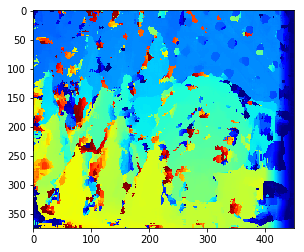

In [28]:
plt.imshow(Dbasic2,cmap='jet')
#basic SAD result

In [ ]:
#Subpixel rendering
plt.imshow(Dbasic2,cmap='jet')

In [ ]:
MINIMUM_INDEX=0
        for i in range(mind,maxd+1):
            block=rightI[minr:maxr,minc+i:maxc+i]
            blockindex=i-mind
            SAD=np.sum(np.absolute(template-block)) 
            if(i==mind):
                MINIMUN_SAD=SAD
            if(SAD<MINIMUM_SAD):
                MINIMUM_SAD=SAD
                MINIMUM_INDEX=blockindex

In [ ]:
leftI=cv2.cvtColor(cv2.imread('right.png'),cv2.COLOR_BGR2GRAY)
rightI=cv2.cvtColor(cv2.imread('left.png'),cv2.COLOR_BGR2GRAY)

In [ ]:
375%7

In [ ]:
a[0:3,1:3]

In [ ]:
leftI.shape

In [ ]:
stereo=cv2.StereoBM_create(numDisparities=80,blockSize=13)

In [ ]:
dis=stereo.compute(rightI,leftI)

In [ ]:
plt.imshow(dis,cmap='jet')

In [ ]:
n=np.array([1,4,5,6,3])

In [ ]:
np.argmin(n)

In [ ]:
dyanamic.shape

In [ ]:
dyanamic[:]=1

In [ ]:
disparitycost=finf*np.ones((leftI.shape[1],2*disparityrange+1))

In [ ]:
disparitypenalty=0.5

In [ ]:
dyanamic

In [ ]:
for m in range(0,height):
    disparitycost[:]=finf

In [ ]:
numbers = np.arange(20).reshape(5,4) 

In [ ]:
nu

In [ ]:
Ddynamic = np.zeros(leftI.shape, dtype=np.float32)
finf = 1e3 #false infinity
disparityCost = finf*np.ones((leftI.shape[1], 2*disparityrange),dtype=np.float32)
disparityPenalty = 0.5 # Penalty for disparity disagreement between pixels
#Scan over all rows.
for m in range(0,height):
    disparityCost[:] = finf
    #Set min/max row bounds for image block.
    minr=max([0,m-halfblock-1])
    maxr=min([height-1,m+halfblock-1])
   # Scan over all columns.
    for n in range(0,width):
        minc = max([0,n-halfblock-1])
        maxc = min([width-1,n+halfblock-1])
        # Compute disparity bounds.
        #mind = max( ‐disparityRange, 1‐minc )
        mind=0
        maxd=min([disparityrange,width-maxc])
        #Compute and save all matching costs.
        for d in range (mind,maxd):
            disparityCost[n, d+disparityrange] = np.sum(np.abs(leftI[minr:maxr,minc+d:maxc+d]- rightI[minr:maxr,minc:maxc]))
        print(disparityCost

In [63]:
# I_disp=zeros(size(left_I), 'single');
# disp_range=55;
# h_block_size=9;
# blocksize=h_block_size*2+1;
# min_diff= Inf;
# disp_cost= min_diff*ones(col,2*disp_range+1,'single');
penalty=0.4
Ddynamic = np.zeros(leftI.shape, dtype=np.float32)
finf =  math.inf#false infinity
disparityCost = finf*np.ones((leftI.shape[1], 2*disparityrange),dtype=np.float32)
disparityPenalty = 0.5 # Penalty for disparity disagreement between pixels


# for 
#     disp_cost(:)= min_diff;
#     row_min= max(1, m- h_block_size);
#     row_max= min(row, m+ h_block_size);
    
#     for n =1:col
#           col_min= max(1,n-h_block_size);
#           col_max= min(col,n+h_block_size);
#           %% setting the pixel search limit
#           pix_min= max(-disp_range, 1 - col_min);
#           pix_max= min(disp_range, col - col_max);
         
#           for i = pix_min : pix_max
#               disp_cost(n,i+disp_range+1)=sumsqr(left_I(row_min:row_max ,(col_min :col_max)+i)-right_I(row_min:row_max ,col_min:col_max));
             
#           end
#     end
for m in range(0,height):
        disparityCost[:] = finf
        #Set min/max row bounds for image block.
        minr=max([0,m-halfblock-1])
        maxr=min([height-1,m+halfblock-1])
       # Scan over all columns.
        for n in range(0,width):
            minc = max([0,n-halfblock-1])
            maxc = min([width-1,n+halfblock-1])
            template=rightI[minr:maxr,minc:maxc]
            # Compute disparity bounds.
            mind = max([-disparityrange, 1-minc ])
            #mind=0
            maxd=min([disparityrange,width-maxc])
            #Compute and save all matching costs.
            for d in range (mind,maxd):
                block=leftI[minr:maxr,minc+i:maxc+i]
                disparityCost[n, d+disparityrange] = np.sum(np.absolute(block-template))
                #print(disparityCost[n,d+disparityrange])
        Index= np.zeros(disparityCost.shape, dtype=np.float32)
        c_p = disparityCost[width-1, :]
        for j in range(height-2,-1,-1):
            diff = (height - j + 1) *finf;
            temp1=np.hstack((np.array([diff,diff]),np.array(c_p[0:160-4]+3*penalty)))
            temp2=np.hstack((diff,c_p[0:160-3]+2*penalty))   
            temp3=c_p[0:160-2]+penalty
            temp4=c_p[1:160-1]
            temp5=c_p[2:160]+penalty
            temp6=np.append(c_p[3:160]+4*penalty,[diff])
            temp7=np.append(c_p[4:160]+5*penalty, [diff, diff]) #160 is disparity range*2 
            
            arr=np.array([temp1,temp2,temp3,temp4,temp5,temp6,temp7])
            
#             arr = np.array([np.hstack((np.array([diff,diff]),c_p[0:width-5]+3*penalty)),np.hstack((diff,c_p[0:width-4]+2*penalty),
#                             c_p[0:width-3]+penalty,
#                              c_p[1:width-2],
#                              c_p[2:width-1]+penalty,
#                           np.append(c_p[3:width-1]+4*penalty,[diff]),
#                           np.append(c_p[4:width-1]+5*penalty, [diff, diff])
#             index = np.array([[diff, diff, c_p[0:width-5]+3*penalty],[diff, c_p[0:width-4]+2*penalty],[c_p[0:width-3]+penalty],
#                              [c_p[1:width-2]],
#                              [c_p[2:width-1]+penalty],
#                           [c_p[3:width-1]+4*penalty, diff],
#                           [c_p[4:width-1]+5*penalty, diff, diff]]).argmin(axis=0) #indexes to zero
            z=np.amin(arr,axis=0)
            index=np.argmin(arr,axis=0)
            c_p=np.concatenate([[diff],disparityCost[j,1:160-1]+z,[diff]])
            #temp10=np.arange(1,disparityCost.shape[1]-1) + (index - 4)
            
            Index[j, 1:160-1] = np.arange(1,disparityCost.shape[1]-1) + (index -4) #leaving first and last indices
            
        indexx = np.argmin(c_p)
        Ddynamic[m,0] = indexx
        
        for k in range(0,width-1):
            maximum =int(max([0,min([Index.shape[1]-1,np.around([Ddynamic[m,k]])])]))
            Ddynamic[m,k+1] = Index[k,maximum]
            print(Ddynamic[m,k+1])
            


80.0
80.0
80.0
80.0
80.0
80.0
80.0
79.0
78.0
77.0
76.0
75.0
74.0
73.0
72.0
71.0
70.0
69.0
68.0
67.0
66.0
65.0
64.0
63.0
62.0
61.0
60.0
59.0
58.0
57.0
56.0
55.0
54.0
53.0
52.0
51.0
50.0
49.0
48.0
47.0
46.0
45.0
44.0
43.0
42.0
41.0
40.0
39.0
38.0
37.0
36.0
35.0
34.0
33.0
32.0
31.0
30.0
29.0
28.0
27.0
26.0
25.0
24.0
23.0
22.0
21.0
20.0
19.0
18.0
17.0
16.0
15.0
14.0
13.0
12.0
11.0
10.0
9.0
8.0
7.0
6.0
5.0
4.0
3.0
2.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0

KeyboardInterrupt: 

In [56]:
pop=Ddynamic-disparityrange-1

In [31]:
Ddynamic

array([[120.,   0.,   0., ...,   0.,   0.,   0.],
       [120.,   0.,   0., ...,   0.,   0.,   0.],
       [120.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [155.,   0.,   0., ...,   0.,   0.,   0.],
       [152.,   0.,   0., ...,   0.,   0.,   0.],
       [144.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32)

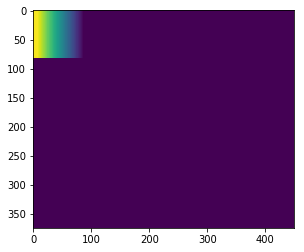

In [61]:
plt.imshow(Ddynamic)

In [5]:
left_img = cv2.imread('left.png', cv2.IMREAD_GRAYSCALE)  #read it as a grayscale image
right_img = cv2.imread('right.png', cv2.IMREAD_GRAYSCALE)

In [9]:

#Disparity Computation for Left Image

#OcclusionCost = 20 (You can adjust this, depending on how much threshold you want to give for noise)
OcclusionCost = 20


rows = left_img.shape[0]
cols=left_img.shape[1]
d_map_l = np.zeros(left_img.shape)
d_map_r = np.zeros(right_img.shape)
for x in range(rows):

        CostMatrix = np.zeros((cols+1, cols+1))
        DirectionMatrix = np.zeros((cols+1, cols+1))

        for i in range(1, cols+1):
            CostMatrix[i, 0] = i * OcclusionCost
            CostMatrix[0, i] = i * OcclusionCost

        for r in range(1, cols+1):
            for c in range(1, cols+1):
                min1 = CostMatrix[r-1, c-1] + np.abs(left_img[x, r-1] - right_img[x, c-1])
                min2 = CostMatrix[r-1, c] + OcclusionCost
                min3 = CostMatrix[r, c-1] + OcclusionCost
                CostMatrix[r, c] = min([min1, min2, min3])
                cmin = CostMatrix[r, c]

                if cmin == min1 :
                    DirectionMatrix[r, c] = 1
                elif cmin == min2 :
                    DirectionMatrix[r, c] = 2
                elif cmin == min3 :
                    DirectionMatrix[r, c] = 3

        p = cols
        q = cols

        while (p != 0 and q != 0):
            if DirectionMatrix[p, q] == 1 :
                p = p - 1
                q = q - 1
                d_map_l[x][p] = np.abs(p - q)
                d_map_r[x][q] = np.abs(p - q)
            elif DirectionMatrix[p][q] == 2 :
                p = p - 1
                d_map_l[x][p] = np.abs(p - q)
            elif DirectionMatrix[p][q] == 3 :
                q = q - 1
                d_map_r[x][q] = np.abs(p - q)

    


# def show_image(title, image):
#     max_val = image.max()
#     # image = np.absolute(image)
#     image = np.divide(image, max_val)
#     # cv2.imshow(title, image)
#     cv2.imwrite(title+str(random.randint(1, 100))+'.jpg', image*255)


# def main():
#     optimal_match()
#     show_image('D-Map_Left_using_DP_', d_map_l)
#     show_image('D-Map_Right_using_DP_', d_map_r)

/Users/avijitprasad/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in ubyte_scalars


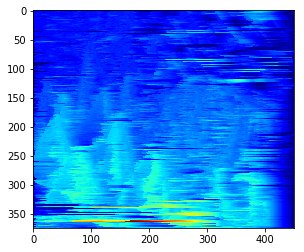

In [22]:
plt.imshow(d_map_r,cmap='jet')

In [18]:
lol=np.divide(d_map_l,d_map_l.max())

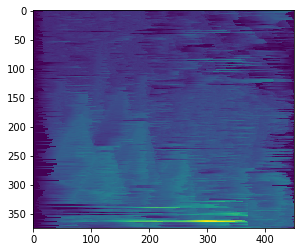

In [62]:
plt.imshow(lol)